In [166]:
import pandas as pd

# Data Cleaning

In [167]:
data = pd.read_csv("/content/TCS1.CSV")

In [168]:
data = pd.DataFrame(data)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [170]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [171]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


In [172]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [173]:
# checking null values in dataset
data.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [174]:
data = data.dropna()

In [175]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Preprocessing

In [176]:
# converting Date to Numeric data
data['Date'] = pd.to_datetime(data['Date'])

# creating new column which consist of numeric ata of date
data['Num_Date'] = data['Date'].dt.day

data.drop('Date',inplace=True, axis=1)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4486 non-null   float64
 1   High       4486 non-null   float64
 2   Low        4486 non-null   float64
 3   Close      4486 non-null   float64
 4   Adj Close  4486 non-null   float64
 5   Volume     4486 non-null   float64
 6   Num_Date   4486 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 280.4 KB


In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [179]:
data = pd.DataFrame(data, columns=['Date','Open','High','Low','Close','Adj Close','Volume'])

# Data Visualization

<Figure size 1000x800 with 0 Axes>

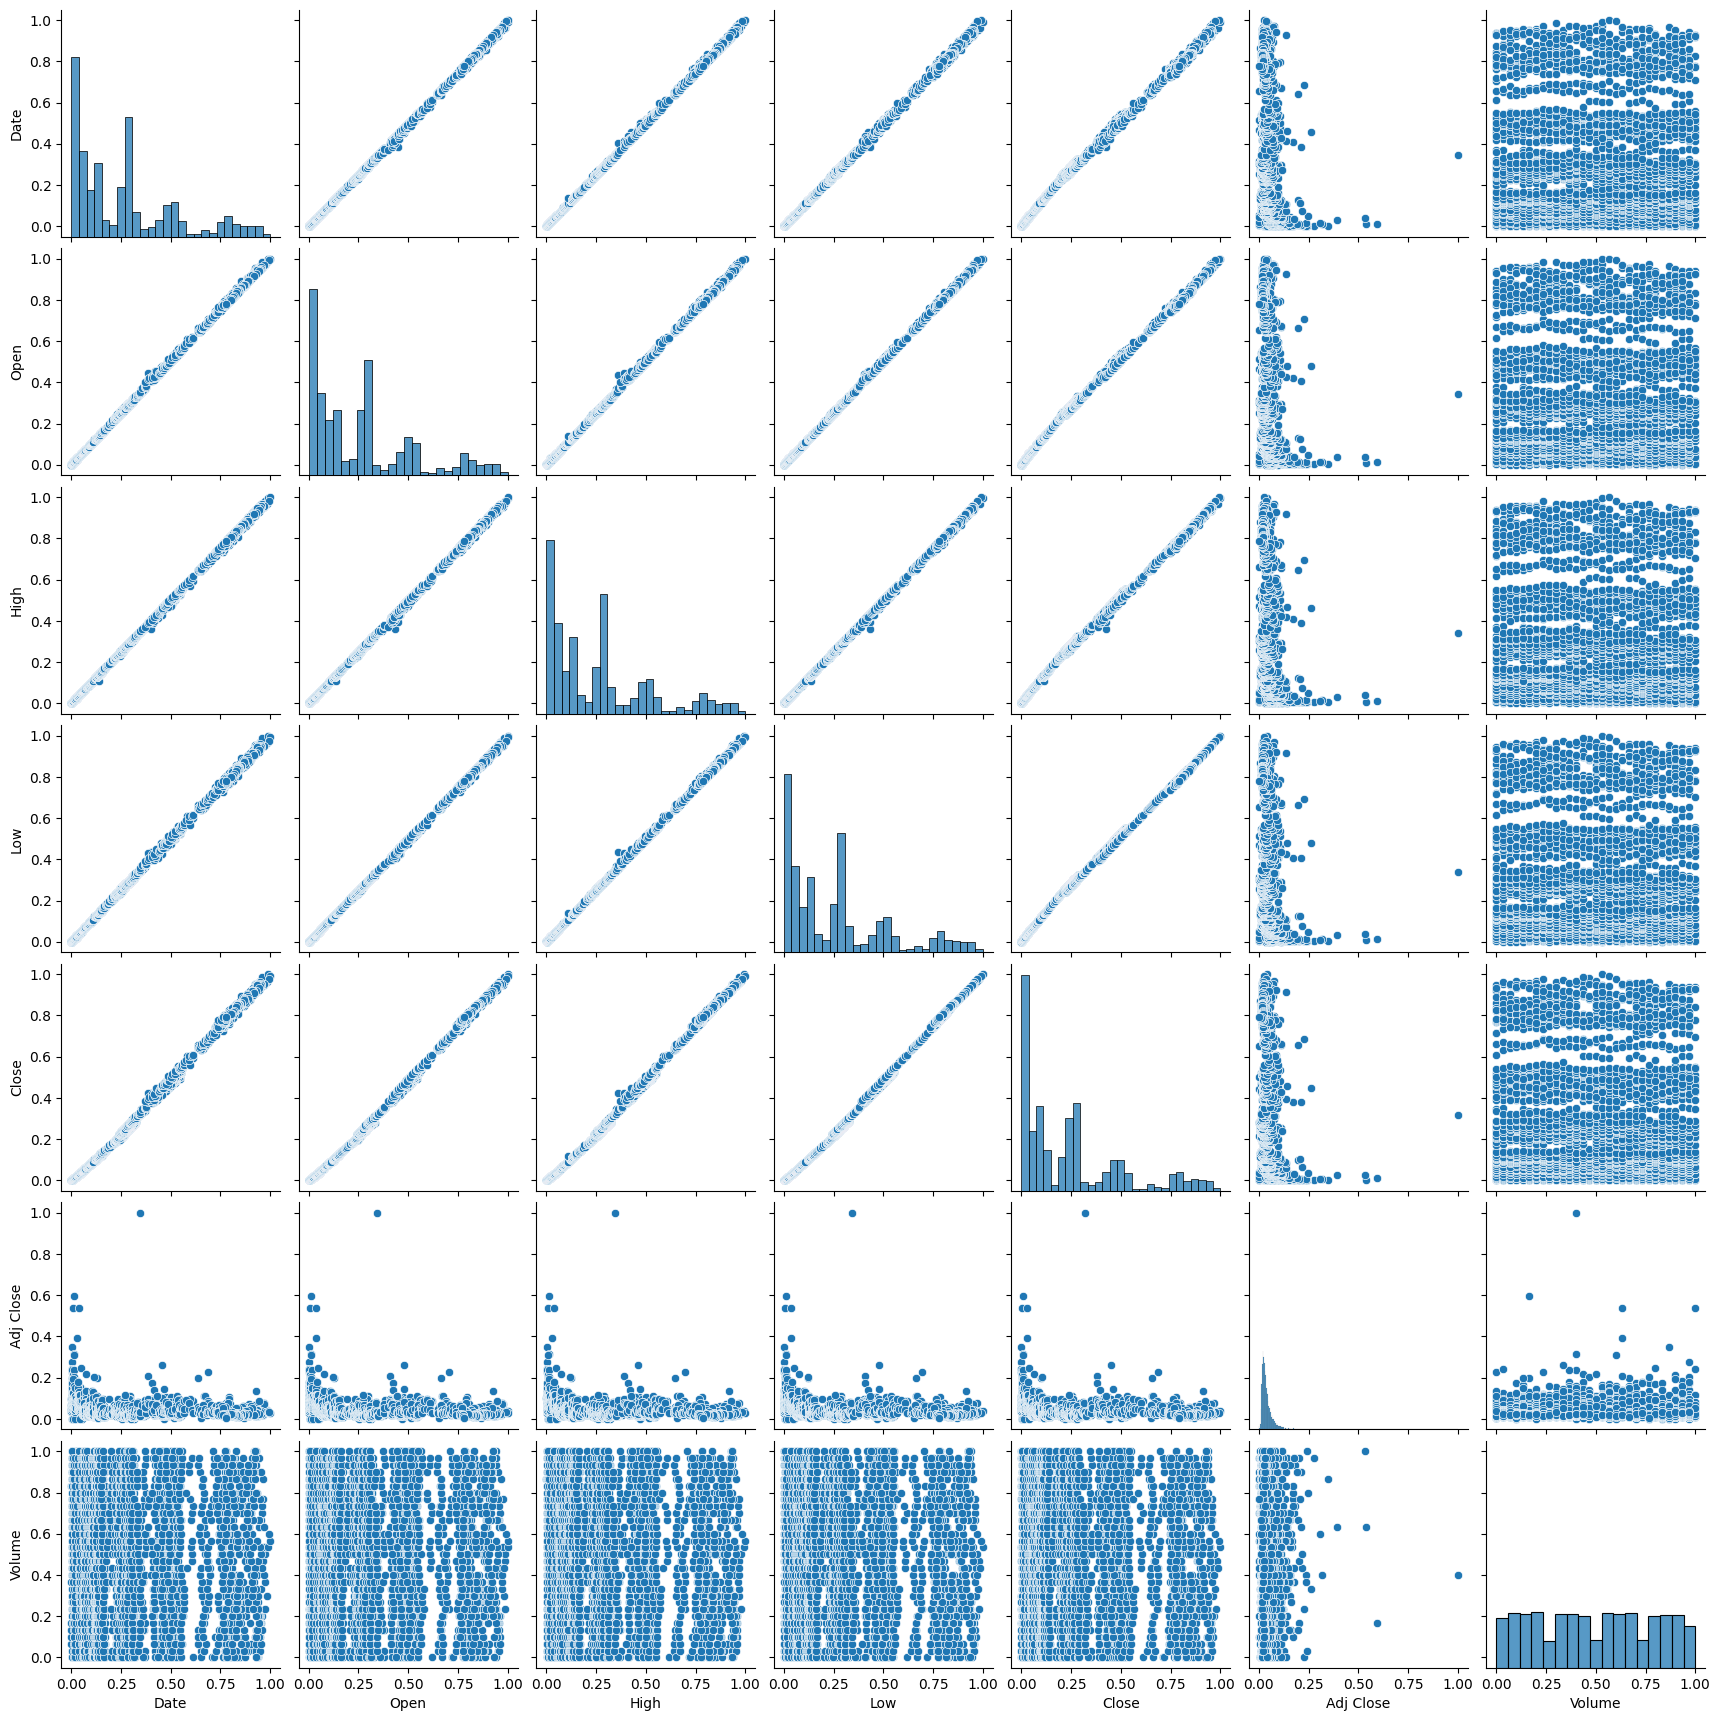

In [180]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,8))

sns.pairplot(data)

plt.show()

# Data Spliting

In [181]:
X = data.drop(['Adj Close','Close'],axis=1)
y = data['Close']

In [182]:
y = y.to_frame(name='Close')

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# Model Selection

# **Decision Tree**

In [184]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()

DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [185]:
# predictions and model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

DT_pred = DT_model.predict(X_val)

DT_mae = mean_absolute_error(y_val, DT_pred)
DT_mse = mean_squared_error(y_val, DT_pred)
DT_r2 = r2_score(y_val,DT_pred)

print("MAE of the model = {} ".format(DT_mae))
print("MSE of the model = {} ".format(DT_mse))
print("R2_score of the model = {} ".format(DT_r2))



MAE of the model = 0.0035686345512767064 
MSE of the model = 4.293737783260765e-05 
R2_score of the model = 0.9993590022379215 


# RandomForest

In [186]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

RF_model.fit(X_train,y_train)


<ipython-input-186-de3cd80e6083>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train,y_train)


RandomForestRegressor()

In [187]:
RF_pred = RF_model.predict(X_val)


RF_mae = mean_absolute_error(y_val, RF_pred)
RF_mse = mean_squared_error(y_val, RF_pred)
RF_r2 = r2_score(y_val,RF_pred)

print("MAE of the model = {} ".format(RF_mae))
print("MSE of the model = {} ".format(RF_mse))
print("R2_score of the model = {} ".format(RF_r2))




MAE of the model = 0.0029430822992676338 
MSE of the model = 2.5569836281650478e-05 
R2_score of the model = 0.9996182764607296 


# KNN algorithm

In [188]:
from sklearn.neighbors import KNeighborsRegressor

KN_model = KNeighborsRegressor(n_neighbors=2)

KN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [189]:
KN_pred = KN_model.predict(X_val)


KN_mae = mean_absolute_error(y_val, KN_pred)
KN_mse = mean_squared_error(y_val, KN_pred)
KN_r2 = r2_score(y_val,KN_pred)

print("MAE of the model = {} ".format(KN_mae))
print("MSE of the model = {} ".format(KN_mse))
print("R2_score of the model = {} ".format(KN_r2))

MAE of the model = 0.005142154815690261 
MSE of the model = 6.491429479328323e-05 
R2_score of the model = 0.9990309161902804 


# svm

In [190]:
from sklearn.svm import SVR

SV_model =SVR()

SV_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [191]:
SV_pred = SV_model.predict(X_val)


SV_mae = mean_absolute_error(y_val, SV_pred)
SV_mse = mean_squared_error(y_val, SV_pred)
SV_r2 = r2_score(y_val,SV_pred)

print("MAE of the model = {} ".format(SV_mae))
print("MSE of the model = {} ".format(SV_mse))
print("R2_score of the model = {} ".format(SV_r2))

MAE of the model = 0.05179073678993718 
MSE of the model = 0.003278921183405599 
R2_score of the model = 0.9510500816144757 


Based on the results Random Forest Regressor has the best performance, with the lowest MAE, MSE, and highest R2 score. It is also generally more robust to overfitting than KNN and SVM regressors. For these reasons, I would use the Random Forest Regressor for your stock prediction task.

# Hyperparameter tuning

In [192]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the grid search object
clf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Print the best hyperparameters
print(clf.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWa

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [193]:
RF_model2 = RandomForestRegressor(max_depth= 7, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)

RF_model2.fit(X_train, y_train)

<ipython-input-193-921c2ab5ac90>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model2.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=2,
                      n_estimators=300)

In [194]:
RF_pred2 = RF_model2.predict(X_val)


RF_mae2 = mean_absolute_error(y_val, RF_pred)
RF_mse2 = mean_squared_error(y_val, RF_pred)
RF_r22 = r2_score(y_val,RF_pred)

print("MAE of the model = {} ".format(RF_mae2))
print("MSE of the model = {} ".format(RF_mse2))
print("R2_score of the model = {} ".format(RF_r22))

MAE of the model = 0.0029430822992676338 
MSE of the model = 2.5569836281650478e-05 
R2_score of the model = 0.9996182764607296 


In [195]:
import pickle

with open('RF_model.pkl','wb') as f:
  pickle.dump(RF_model2, f)

f.close()